### 체지방율 예측 프로젝트

In [131]:
import pandas as pd

df = pd.read_csv("df_imputed_mod.csv")

df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,64%_BPM,76%_BPM,Intensity,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Workout_Type
0,34,86.7,1.86,174,152,111.36,132.24,3,74,1.12,712.0,12.8,2.4,5,2,25.060701,Female,Strength
1,26,84.7,1.83,166,156,106.24,126.16,3,73,1.00,833.0,27.9,2.8,5,2,25.291887,Female,Strength
2,22,64.8,1.85,187,166,119.68,142.12,3,64,1.24,1678.0,28.7,1.9,3,2,18.933528,Male,Cardio
3,54,75.3,1.82,187,169,119.68,142.12,3,58,1.45,628.0,31.8,2.4,4,1,22.732762,Female,Cardio
4,34,52.8,1.74,177,169,113.28,134.52,3,66,1.60,1286.0,26.4,3.2,4,2,17.439556,Female,Strength


In [132]:
value_counts_col = {col: df[col].value_counts() for col in df.columns}

value_counts_col

{'Age': 18    229
 33     57
 27     56
 23     55
 26     54
 31     52
 24     51
 21     49
 28     49
 34     48
 30     47
 47     46
 22     46
 29     44
 45     43
 44     43
 42     42
 43     41
 48     41
 20     39
 36     38
 46     38
 50     36
 25     36
 37     36
 49     36
 38     34
 52     34
 35     34
 51     33
 54     33
 19     32
 59     31
 32     31
 39     30
 55     28
 41     28
 40     26
 53     24
 56     20
 57     15
 58     15
 Name: Age, dtype: int64,
 'Weight (kg)': 40.00     155
 129.90     13
 58.70       8
 57.40       8
 59.00       7
          ... 
 78.14       1
 102.80      1
 90.70       1
 101.40      1
 40.60       1
 Name: Weight (kg), Length: 636, dtype: int64,
 'Height (m)': 2.000    69
 1.750    65
 1.710    65
 1.700    63
 1.730    63
          ..
 1.798     1
 1.734     1
 1.674     1
 1.802     1
 1.778     1
 Name: Height (m), Length: 66, dtype: int64,
 'Max_BPM': 192    69
 177    63
 168    60
 190    59
 196    59
 194    57

#### 키가 2m인 사람은 이상치 고려
#### BMI 계산해보기

In [133]:
# 타겟 변수 이진 변수화
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [134]:
df = pd.get_dummies(df, columns=['Workout_Type'], drop_first=False)

In [135]:
df.columns

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', '64%_BPM',
       '76%_BPM', 'Intensity', 'Resting_BPM', 'Session_Duration (hours)',
       'Calories_Burned', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI', 'Gender',
       'Workout_Type_Cardio', 'Workout_Type_HIIT', 'Workout_Type_Strength',
       'Workout_Type_Yoga'],
      dtype='object')

In [136]:
df.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,64%_BPM,76%_BPM,Intensity,Resting_BPM,Session_Duration (hours),...,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,34,86.7,1.86,174,152,111.36,132.24,3,74,1.12,...,12.8,2.4,5,2,25.060701,1,0,0,1,0
1,26,84.7,1.83,166,156,106.24,126.16,3,73,1.00,...,27.9,2.8,5,2,25.291887,1,0,0,1,0
2,22,64.8,1.85,187,166,119.68,142.12,3,64,1.24,...,28.7,1.9,3,2,18.933528,0,1,0,0,0
3,54,75.3,1.82,187,169,119.68,142.12,3,58,1.45,...,31.8,2.4,4,1,22.732762,1,1,0,0,0
4,34,52.8,1.74,177,169,113.28,134.52,3,66,1.60,...,26.4,3.2,4,2,17.439556,1,0,0,1,0


In [137]:
import pandas as pd

# 이진 변수 제외
non_binary_df = df.loc[:, df.nunique() > 2]

# 상관관계 계산
correlation_matrix = non_binary_df.corr()
print(correlation_matrix)

                                    Age  Weight (kg)  Height (m)   Max_BPM  \
Age                            1.000000     0.003816   -0.036440  0.000986   
Weight (kg)                    0.003816     1.000000   -0.059305  0.005247   
Height (m)                    -0.036440    -0.059305    1.000000  0.010404   
Max_BPM                        0.000986     0.005247    0.010404  1.000000   
Avg_BPM                       -0.003011     0.038115   -0.033491 -0.067133   
64%_BPM                        0.000986     0.005247    0.010404  1.000000   
76%_BPM                        0.000986     0.005247    0.010404  1.000000   
Intensity                      0.022615     0.027934   -0.017004 -0.400241   
Resting_BPM                    0.004486    -0.025568   -0.003816 -0.017082   
Session_Duration (hours)       0.010631     0.003503    0.036120  0.020116   
Calories_Burned               -0.015256    -0.001106    0.027021 -0.011697   
Fat_Percentage                -0.032359     0.006723   -0.030983

In [138]:
correlation_matrix.to_csv("corr.csv", index=False, encoding = 'utf-8-sig')

In [139]:
df.to_csv("df_imputed.csv", index=False, encoding = 'utf-8-sig')

In [140]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')  # Windows 사용자

# 한글 깨짐 방지를 위한 마이너 문제 해결
plt.rcParams['axes.unicode_minus'] = False

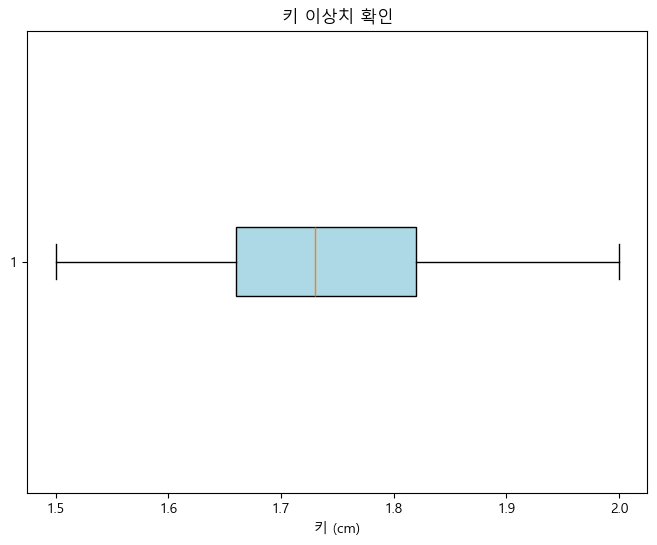

In [141]:
import pandas as pd
import matplotlib.pyplot as plt

# Boxplot 생성
plt.figure(figsize=(8, 6))
plt.boxplot(df["Height (m)"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("키 이상치 확인")
plt.xlabel("키 (cm)")
plt.show()

<Axes: xlabel='Fat_Percentage', ylabel='Count'>

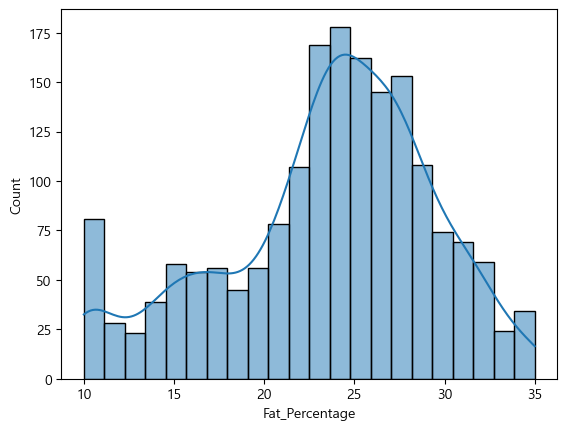

In [142]:
import seaborn as sns
sns.histplot(df['Fat_Percentage'], kde=True)

<Axes: ylabel='Fat_Percentage'>

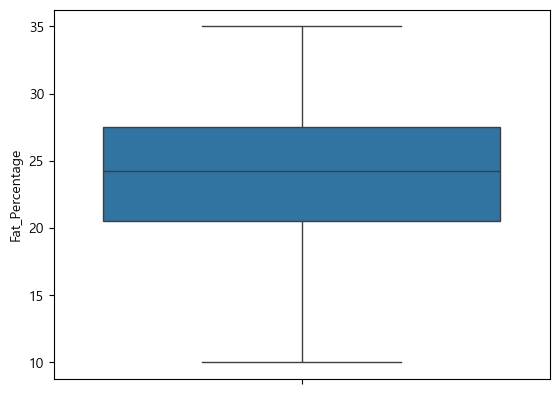

In [143]:
sns.boxplot(data=df, y='Fat_Percentage')

<Axes: xlabel='BMI', ylabel='Fat_Percentage'>

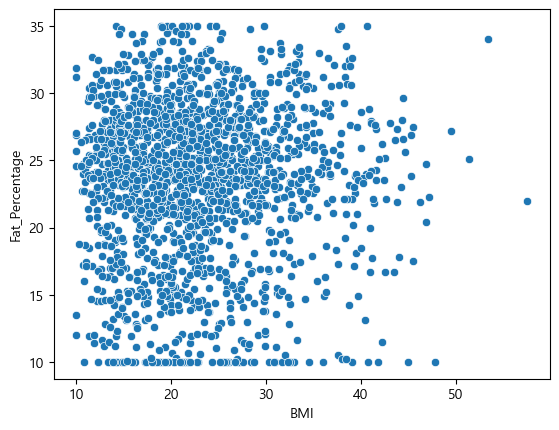

In [144]:
sns.scatterplot(data=df, x='BMI', y='Fat_Percentage')


In [145]:
df.to_csv("df_encoding.csv", index = False, encoding = 'utf-8-sig')

In [146]:
y = df['Fat_Percentage']

df = df.drop(['64%_BPM', '76%_BPM', 'Resting_BPM'], axis = 1)
X = df.drop(['Fat_Percentage'], axis = 1)

X = X.drop(['Weight (kg)', 'Height (m)'], axis = 1)

In [119]:
# 3. 스케일링 방법
# StandardScaler:

# 평균이 0, 분산이 1이 되도록 데이터를 표준화.
# 선형 회귀와 같은 모델에서 일반적으로 사용.
from sklearn.preprocessing import StandardScaler

# 스케일링할 컬럼과 스케일링하지 않을 컬럼 지정
columns_to_scale = ['Age', 'Max_BPM', 'Avg_BPM',
                                         'Session_Duration (hours)', 'Calories_Burned', 'Water_Intake (liters)',
                                         'Workout_Frequency (days/week)', 'BMI']  # 스케일링할 컬럼
columns_to_keep = [col for col in X.columns if col not in columns_to_scale]  # 스케일링 제외

# StandardScaler 적용
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(X[columns_to_scale])

# 스케일링한 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_columns, columns=columns_to_scale)

# 스케일링하지 않은 컬럼과 합치기
X = pd.concat([scaled_df, X[columns_to_keep]], axis=1)

# 결과 출력
print(X)


           Age   Max_BPM   Avg_BPM  Session_Duration (hours)  Calories_Burned  \
0    -0.040065 -0.547687  0.377065                 -0.735412        -0.985963   
1    -0.691227 -1.249724  0.641749                 -1.059499        -0.615291   
2    -1.016809  0.593124  1.303460                 -0.411324         1.973284   
3     1.587842  0.593124  1.501973                  0.155829        -1.243288   
4    -0.040065 -0.284423  1.501973                  0.560939         0.772430   
...        ...       ...       ...                       ...              ...   
1795  1.587842 -0.635441 -0.814015                 -0.762419         1.084898   
1796  1.425051 -1.425234  1.501973                 -1.680667         1.020566   
1797  1.018075  0.680879 -1.144870                 -0.519353         0.695845   
1798  0.041331 -0.021159  0.377065                 -0.951470        -0.238492   
1799  0.448307  0.329860  0.641749                 -0.276288         0.441583   

      Water_Intake (liters)

In [120]:
# Cardio 0, HIIT 1, Strength 2, Yoga 3

In [121]:
X.columns

Index(['Age', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)',
       'Calories_Burned', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'BMI', 'Intensity', 'Experience_Level',
       'Gender', 'Workout_Type_Cardio', 'Workout_Type_HIIT',
       'Workout_Type_Strength', 'Workout_Type_Yoga'],
      dtype='object')

In [147]:
from sklearn.model_selection import train_test_split

# 데이터 나누기 (80:20 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과 확인
print("Train 데이터 개수:", len(X_train))
print("Test 데이터 개수:", len(X_test))

Train 데이터 개수: 1440
Test 데이터 개수: 360


In [123]:
X_train.shape

(1440, 15)

In [124]:
X_train.head()

,Age,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Water_Intake (liters),Workout_Frequency (days/week),BMI,Intensity,Experience_Level,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
832,-0.935413,-0.021159,1.237289,1.641230,-0.823602,-1.283856,0.707797,0.049804,3,2,1,0,1,0,0
836,-1.179599,-0.108913,-0.152304,-2.139791,0.358871,1.123905,-1.428053,0.413013,3,2,0,0,0,0,1
1103,0.448307,-1.688498,-0.086133,0.641960,-0.566276,-0.150792,0.707797,1.296697,3,2,0,1,0,0,0
859,-0.609832,0.593124,-0.814015,1.641230,-0.547896,-0.150792,1.775721,-0.925265,2,1,1,0,0,1,0
567,-1.179599,1.470671,0.774091,-0.249280,-0.308951,0.699006,-1.428053,1.284622,3,3,1,0,0,1,0


In [125]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# 모델 정의
ridge = Ridge()
lasso = Lasso()
en = ElasticNet()

# 하이퍼파라미터 후보 설정
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# 데이터 분할 및 학습
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 성능 확인
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 성능 (MSE): ", -grid_search.best_score_)

최적 하이퍼파라미터:  {'alpha': 1}
최적 성능 (MSE):  34.16516042088638


In [126]:
X_train

,Age,Max_BPM,Avg_BPM,Session_Duration (hours),Calories_Burned,Water_Intake (liters),Workout_Frequency (days/week),BMI,Intensity,Experience_Level,Gender,Workout_Type_Cardio,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
832,-0.935413,-0.021159,1.237289,1.641230,-0.823602,-1.283856,0.707797,0.049804,3,2,1,0,1,0,0
836,-1.179599,-0.108913,-0.152304,-2.139791,0.358871,1.123905,-1.428053,0.413013,3,2,0,0,0,0,1
1103,0.448307,-1.688498,-0.086133,0.641960,-0.566276,-0.150792,0.707797,1.296697,3,2,0,1,0,0,0
859,-0.609832,0.593124,-0.814015,1.641230,-0.547896,-0.150792,1.775721,-0.925265,2,1,1,0,0,1,0
567,-1.179599,1.470671,0.774091,-0.249280,-0.308951,0.699006,-1.428053,1.284622,3,3,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1.587842,-1.512988,1.501973,0.614953,1.075707,-1.567122,1.775721,-0.860142,3,3,1,0,0,0,1
1294,-0.040065,1.031898,1.171118,1.641230,2.184659,-1.708755,0.707797,0.399614,3,2,1,0,0,0,1
860,-0.935413,0.856388,1.171118,-0.276288,-0.333458,-1.708755,-1.428053,1.208711,3,1,0,0,0,1,0
1459,0.692493,0.593124,-1.144870,0.101815,-0.152717,-1.567122,-0.360128,0.124943,2,1,0,0,1,0,0


In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [50, 60, 70],
    'max_depth': [7, 8],
    'min_samples_split': [9, 10],
    'min_samples_leaf': [4, 5],
    'max_features' : [0.8, 1],
    'random_state' : [42]
}

# GridSearchCV로 최적의 파라미터 찾기
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# 평가
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Best Random Forest MSE: {best_mse}")
print(f"Best Random Forest R2 Score: {best_r2}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Random Forest MSE: 34.395229865615065
Best Random Forest R2 Score: -0.014383783642170744


In [149]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 1,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 60,
 'random_state': 42}

In [129]:
importances = best_rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importance.sort_values(by='Importance', ascending=False))

                          Feature  Importance
7                             BMI    0.128371
5           Water_Intake (liters)    0.116791
4                 Calories_Burned    0.115721
3        Session_Duration (hours)    0.109054
1                         Max_BPM    0.105391
0                             Age    0.094677
2                         Avg_BPM    0.088144
6   Workout_Frequency (days/week)    0.065466
9                Experience_Level    0.057627
8                       Intensity    0.027353
14              Workout_Type_Yoga    0.024231
12              Workout_Type_HIIT    0.020588
10                         Gender    0.019315
13          Workout_Type_Strength    0.015223
11            Workout_Type_Cardio    0.012046


In [130]:
X.columns

Index(['Age', 'Max_BPM', 'Avg_BPM', 'Session_Duration (hours)',
       'Calories_Burned', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'BMI', 'Intensity', 'Experience_Level',
       'Gender', 'Workout_Type_Cardio', 'Workout_Type_HIIT',
       'Workout_Type_Strength', 'Workout_Type_Yoga'],
      dtype='object')

In [193]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 설정
param_grid = {
    'n_estimators': [50, 70],
    'learning_rate': [0.005, 0.01],
    'max_depth': [3, 4],
    'subsample': [0.8, 1.0]
}

# GridSearchCV로 최적의 파라미터 찾기
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='neg_mean_squared_error', 
                           verbose=2, 
                           n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적 모델로 예측
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)

# 평가
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)

print(f"Best XGBoost MSE: {best_mse}")
print(f"Best XGBoost R2 Score: {best_r2}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best XGBoost MSE: 34.32269636494964
Best XGBoost R2 Score: -0.012244626348171472


In [194]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50, 'subsample': 1.0}

In [184]:
y_test = y_test.to_numpy().reshape(360, 1)

In [186]:
y_pred_best = y_pred_best.reshape(360, 1)

In [187]:
import numpy as np
import pandas as pd

# 두 ndarray를 수평으로 합침 (axis=1)
combined_array = np.hstack((y_test, y_pred_best))

# DataFrame으로 변환
df = pd.DataFrame(combined_array, columns=['Feature1', 'Feature2'])

# 결과 출력
print(df)

     Feature1   Feature2
0        28.0  23.675426
1        22.8  23.622181
2        24.9  23.623434
3        27.0  23.756847
4        25.0  23.956614
..        ...        ...
355      23.5  23.503935
356      30.0  23.757681
357      21.7  23.744623
358      26.6  23.694359
359      21.5  24.118999

[360 rows x 2 columns]


In [191]:
df['Feature2'].sort_values()

203    22.935768
334    22.958405
261    22.992428
317    23.016140
56     23.016668
         ...    
124    24.098103
359    24.118999
313    24.119221
224    24.139116
352    24.209002
Name: Feature2, Length: 360, dtype: float64